In [1]:
import random
import numpy as np
import pandas as pd
from datetime import datetime
from tqdm.notebook import trange
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
from sklearn.utils.extmath import stable_cumsum
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import calinski_harabasz_score, silhouette_score

from KMEC import KMEC
from K_Means import K_Means
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture as GMM

In [2]:
data = pd.read_csv('Live_20210128.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [3]:
status_type = list(set(data['status_type']))
data['status_type'] = pd.Series([status_type.index(s_t) for s_t in data['status_type']])
data['status_published'] = pd.Series([datetime.strptime(d_t,"%m/%d/%Y %H:%M") for d_t in data['status_published']])
data['status_published_year'] = pd.Series([d_t.year - 2012 for d_t in data['status_published']])
data['status_published_month'] = pd.Series([d_t.month for d_t in data['status_published']])
data['status_published_day'] = pd.Series([d_t.day for d_t in data['status_published']])
data['status_published_hour'] = pd.Series([d_t.hour for d_t in data['status_published']])
data['status_published_minute'] = pd.Series([d_t.minute for d_t in data['status_published']])
del data['status_published'],data['status_id']
feature_label = list(data.columns)
feature = np.array(data)
feature = (feature - np.mean(feature,axis = 0)) / np.std(feature,axis = 0)

In [4]:
feature_pca_c2 = PCA(n_components = 2).fit_transform(feature)
feature_pca_c3 = PCA(n_components = 3).fit_transform(feature)

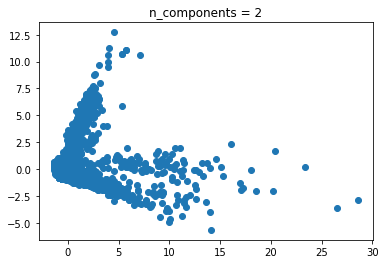

In [5]:
plt.scatter(feature_pca_c2[:,0], feature_pca_c2[:,1])
plt.title('n_components = 2')
plt.show()

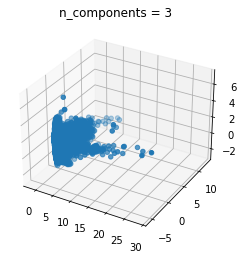

In [6]:
plt_3d = plt.subplot(111, projection='3d')
plt_3d.scatter(feature_pca_c3[:,0], feature_pca_c3[:,1], feature_pca_c3[:,2])
plt.title('n_components = 3')
plt.show()

## K_Means

  0%|          | 0/9 [00:00<?, ?it/s]

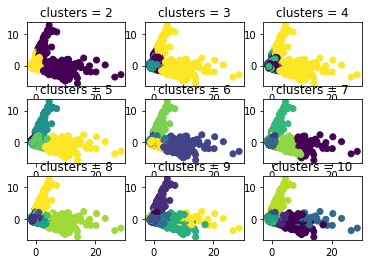

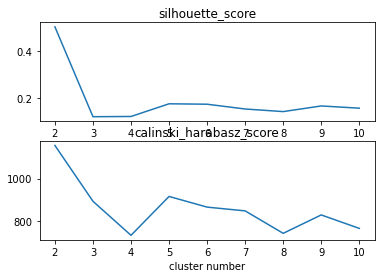

  0%|          | 0/9 [00:00<?, ?it/s]

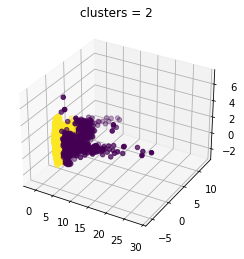

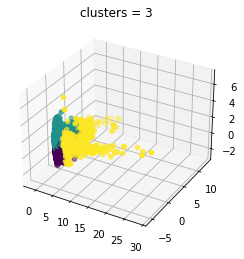

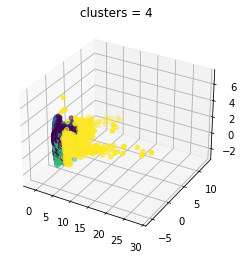

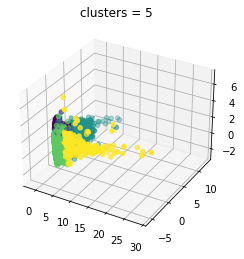

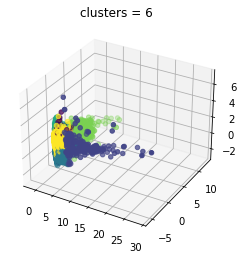

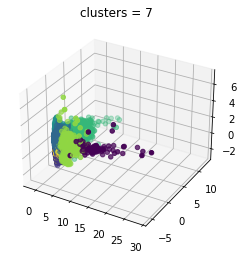

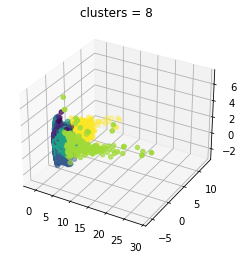

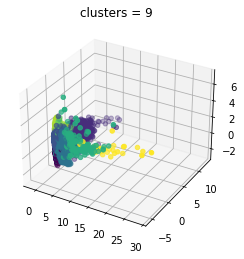

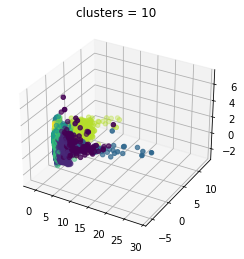

In [7]:
sc_score = [] # 轮廓系数
ch_score = [] # CH指数
labels   = []
for i in trange(2,11):
    labels.append(K_Means(n_clusters = i).fit(feature))
    sc_score.append(silhouette_score(feature, labels[-1])) 
    ch_score.append(calinski_harabasz_score(feature, labels[-1]))
    plt.subplot(3,3,i - 1)
    plt.scatter(feature_pca_c2[:,0], feature_pca_c2[:,1], c=labels[-1], cmap='viridis')
    plt.title('clusters = %d' % i)
plt.show()

plt.subplot(211)
plt.plot(range(2,11),sc_score)
plt.xlabel('cluster number')
plt.title('silhouette_score')

plt.subplot(212)
plt.plot(range(2,11),ch_score)
plt.xlabel('cluster number')
plt.title('calinski_harabasz_score')
plt.show()

for i in trange(2,11):
    plt_3d = plt.subplot(1,1,1, projection='3d')
    plt_3d.scatter(feature_pca_c3[:,0], feature_pca_c3[:,1], feature_pca_c3[:,2], c=labels[i - 2], cmap='viridis')
    plt_3d.set_title('clusters = %d' % i)
    plt.show()

## GMM

  0%|          | 0/9 [00:00<?, ?it/s]

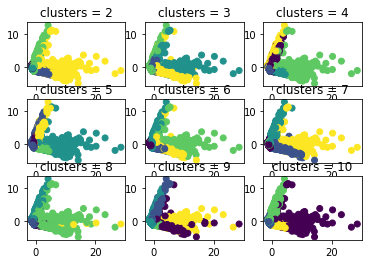

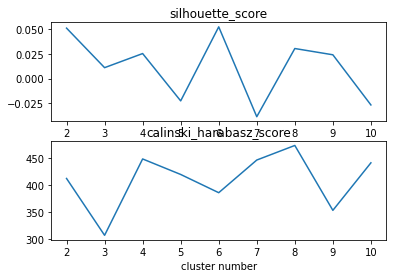

  0%|          | 0/9 [00:00<?, ?it/s]

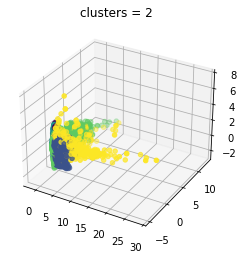

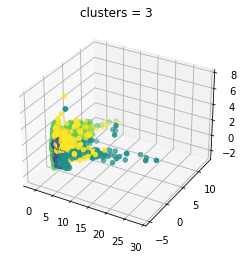

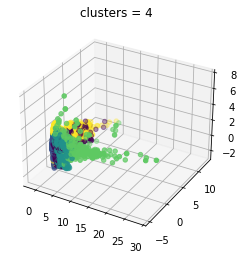

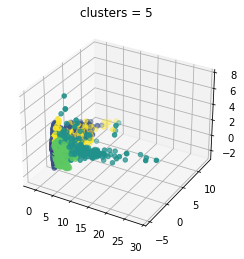

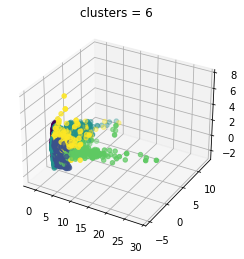

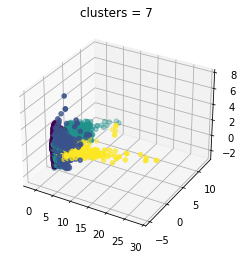

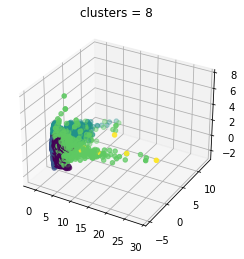

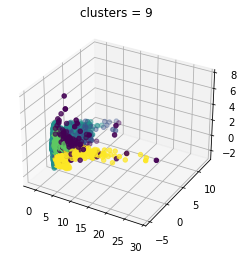

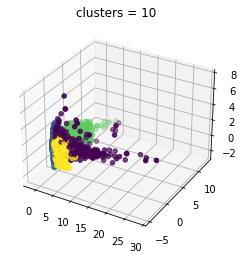

In [84]:
sc_score = [] # 轮廓系数
ch_score = [] # CH指数
labels   = []
for i in trange(2,11):
    labels.append(GMM(n_components = 5).fit(feature).predict(feature))
    sc_score.append(silhouette_score(feature, labels[-1])) 
    ch_score.append(calinski_harabasz_score(feature, labels[-1]))
    plt.subplot(3,3,i - 1)
    plt.scatter(feature_pca_c2[:,0], feature_pca_c2[:,1], c=labels[-1], cmap='viridis')
    plt.title('clusters = %d' % i)
plt.show()

plt.subplot(211)
plt.plot(range(2,11),sc_score)
plt.xlabel('cluster number')
plt.title('silhouette_score')

plt.subplot(212)
plt.plot(range(2,11),ch_score)
plt.xlabel('cluster number')
plt.title('calinski_harabasz_score')
plt.show()

for i in trange(2,11):
    plt_3d = plt.subplot(1,1,1, projection='3d')
    plt_3d.scatter(feature_pca_c3[:,0], feature_pca_c3[:,1], feature_pca_c3[:,2], c=labels[i - 2], cmap='viridis')
    plt_3d.set_title('clusters = %d' % i)
    plt.show()

## DBSCAN

In [14]:
dbscan_sc_score = np.zeros((10,10))
dbscan_ch_score = np.zeros((10,10))
dbscan_labels = []
for eps in range(1,11):
    dbscan_labels.append([DBSCAN(eps = eps / 10, min_samples = 5).fit_predict(feature)])
    if np.unique(dbscan_labels[eps - 1][-1]).shape[0] > 1:
        dbscan_sc_score[eps - 1, n_samples] = silhouette_score(feature, dbscan_labels[eps - 1][-1])
        dbscan_ch_score[eps - 1, n_samples] = calinski_harabasz_score(feature, dbscan_labels[eps - 1][-1])
    for n_samples in trange(1,10):
        dbscan_labels[eps - 1].append(DBSCAN(eps = eps / 10, min_samples = n_samples + 5).fit_predict(feature))
        if np.unique(dbscan_labels[eps - 1][-1]).shape[0] > 1:
            dbscan_sc_score[eps - 1, n_samples] = silhouette_score(feature, dbscan_labels[eps - 1][-1])
            dbscan_ch_score[eps - 1, n_samples] = calinski_harabasz_score(feature, dbscan_labels[eps - 1][-1])

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

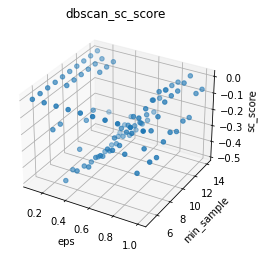

In [86]:
plt_3d = plt.subplot(111, projection='3d')
plt_3d.scatter(np.array([[i] * 10 for i in np.arange(0.1,1.1,0.1)]).flatten(),
               np.array([np.arange(5,15) for i in range(10)]).flatten().T,
               dbscan_sc_score.flatten())
plt_3d.set_xlabel('eps')
plt_3d.set_ylabel('min_sample')
plt_3d.set_zlabel('sc_score')
plt_3d.set_title('dbscan_sc_score')
plt.show()

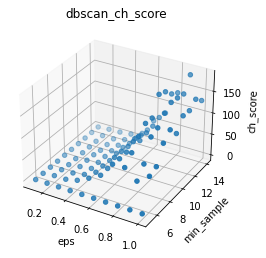

In [92]:
plt_3d = plt.subplot(111, projection='3d')
plt_3d.scatter(np.array([[i] * 10 for i in np.arange(0.1,1.1,0.1)]).flatten(),
               np.array([np.arange(5,15) for i in range(10)]).flatten().T,
               dbscan_ch_score.flatten())
plt_3d.set_xlabel('eps')
plt_3d.set_ylabel('min_sample')
plt_3d.set_zlabel('ch_score')
plt_3d.set_title('dbscan_ch_score')
plt.show()

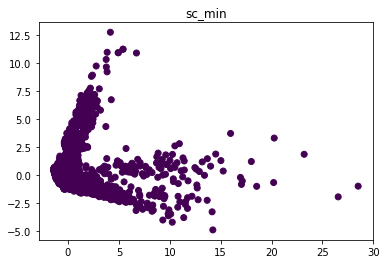

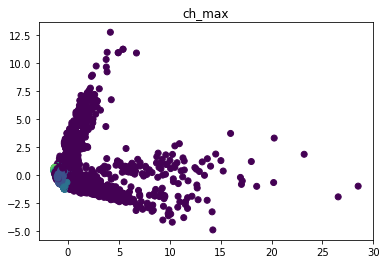

In [88]:
sc_min_id = np.argmin(dbscan_sc_score)
plt.scatter(feature_pca_c2[:,0], feature_pca_c2[:,1], c=dbscan_labels[sc_min_id // 10][sc_min_id % 10], cmap='viridis')
plt.title('sc_min')
plt.show()

ch_max_id = np.argmax(dbscan_ch_score)
plt.scatter(feature_pca_c2[:,0], feature_pca_c2[:,1], c=dbscan_labels[ch_max_id // 10][ch_max_id % 10], cmap='viridis')
plt.title('ch_max')
plt.show()

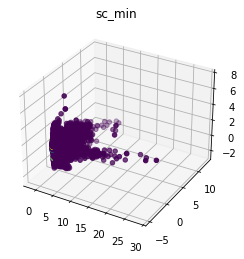

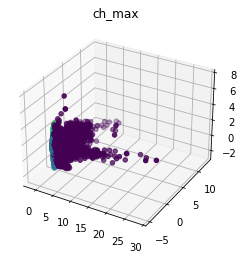

In [89]:
sc_min_id = np.argmin(dbscan_sc_score)
plt_3d = plt.subplot(1,1,1, projection='3d')
plt_3d.scatter(feature_pca_c3[:,0], feature_pca_c3[:,1], feature_pca_c3[:,2], c=dbscan_labels[sc_min_id // 10][sc_min_id % 10], cmap='viridis')
plt_3d.set_title('sc_min')
plt.show()

ch_max_id = np.argmax(dbscan_ch_score)
plt_3d = plt.subplot(1,1,1, projection='3d')
plt_3d.scatter(feature_pca_c3[:,0], feature_pca_c3[:,1], feature_pca_c3[:,2], c=dbscan_labels[ch_max_id // 10][ch_max_id % 10], cmap='viridis')
plt_3d.set_title('ch_max')
plt.show()

## KMEC

In [90]:
kemc = KMEC(n_feature = len(feature_label))
kemc.update(feature)

100%|██████████████████████████████████████████████████████████████████████████████| 7050/7050 [01:54<00:00, 61.46it/s]


sc_score 0.1978852876078051
ch_score 840.8894842696878


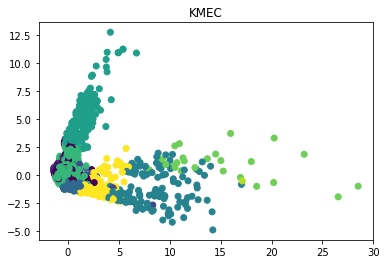

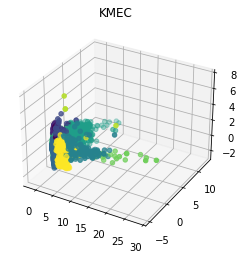

In [91]:
labels = kemc.predict(feature)
print('sc_score',silhouette_score(feature, labels)) 
print('ch_score',calinski_harabasz_score(feature, labels)) 

plt.scatter(feature_pca_c2[:,0], feature_pca_c2[:,1], c=labels, cmap='viridis')
plt.title('KMEC')
plt.show()

plt_3d = plt.subplot(1,1,1, projection='3d')
plt_3d.scatter(feature_pca_c3[:,0], feature_pca_c3[:,1], feature_pca_c3[:,2], c=labels, cmap='viridis')
plt_3d.set_title('KMEC')
plt.show()